# Logistic Regression (without regularazation)


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("ex2data1.txt", names=['Exam1', 'Exam2', 'Admitted'])
data.head()

,Exam1,Exam2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


Text(0,0.5,'Exam2 Score')

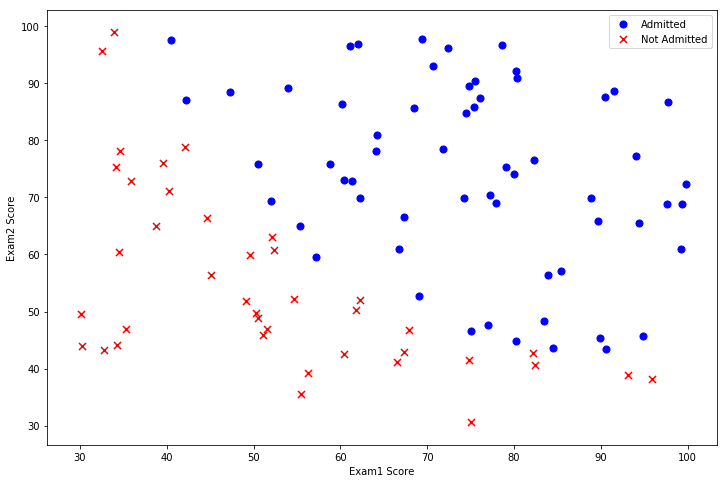

In [3]:
positive = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Exam1'], positive['Exam2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam1'], negative['Exam2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam1 Score')
ax.set_ylabel('Exam2 Score')

# (1) Prepare the data
Decision boundary: 
\\[{{h}_{\theta }}\left( x \right)=X{{\theta }^{T}}={{\theta }_{0}}{{x}_{0}}+{{\theta }_{1}}{{x}_{1}}+{{\theta }_{2}}{{x}_{2}}+...+{{\theta }_{n}}{{x}_{n}}\\] 
Hyphothesis: 
\\[{{h}_{\theta }}\left( x \right)=\frac{1}{1+{{e}^{-{{\theta }^{T}}X}}}\\] 

In [4]:
data.insert(0, 'theta0', 1)
data.head()

,theta0,Exam1,Exam2,Admitted
0,1,34.623660,78.024693,0
1,1,30.286711,43.894998,0
2,1,35.847409,72.902198,0
3,1,60.182599,86.308552,1
4,1,79.032736,75.344376,1


In [5]:
X = data.iloc[:, 0:3]
y = data.iloc[:, 3:4]
X = np.matrix(X.values)
y = np.matrix(y.values)
theta  = np.zeros(3)

# (2) Cost Function
$J\left( \theta  \right)=\frac{1}{m}\sum\limits_{i=1}^{m}{[-{{y}^{(i)}}\log \left( {{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)-\left( 1-{{y}^{(i)}} \right)\log \left( 1-{{h}_{\theta }}\left( {{x}^{(i)}} \right) \right)]}$

In [6]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [7]:
def computeCost(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    hx = X * theta.T
    temp = np.multiply(np.log(sigmoid(hx)), (-y)) - np.multiply(np.log(1 - sigmoid(hx)), (1 - y))
    cost = np.sum(temp) / len(y)
    return cost

In [8]:
cost = computeCost(theta, X, y)
print(cost)

0.6931471805599453


# Optimazation Methods

First I tried use batch gradient desceent, but it takes very long time, seems alpha can only be very small, in addition, it takes long time to get the optimization. and you need to pay attention to the trend of the cost when set the studying ratio.

Then I tried TNC in the reference code, you just set one step graident and adopt TNC to optimize, it is much faster.  

# Optimazation 1:  Gradient descent
$$\frac{\partial J\left( \theta  \right)}{\partial {{\theta }_{j}}}=\frac{1}{m}\sum\limits_{i=1}^{m}{({{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}})x_{_{j}}^{(i)}}$$
Derivation: https://stats.stackexchange.com/questions/278771/how-is-the-cost-function-from-logistic-regression-derivated   

In [9]:
def gradient_descent(theta, X, y, iters, alpha):
    theta = np.matrix(theta)
    cost_arr = []
    m = len(y)
    for i in range(iters):
        temp = np.matrix((alpha/m)* ((sigmoid(X * theta.T) - y).T * X)) 
        theta = theta - temp # one step, dont have to separate theta into two parts
        cost = computeCost(X, y, theta)
        cost_arr.append(cost)
    
    return theta, cost_arr

In [10]:
if 0: # if want to check gradient descent to get the opatimazation, change 0 to 1. 
    alpha = 0.001
    iters = 600000
    theta, cost = gradient_descent(theta, X, y,iters,alpha)
    print(cost[len(cost)-1])
    print(theta)

# Optimazation 2:  SciPy's truncated newton（TNC）


In [11]:
def gradient(theta, X, y):
    theta = np.matrix(theta)
    X = np.matrix(X)
    y = np.matrix(y)
    m = len(y)
    
    gradident = np.matrix((1 / m)* ((sigmoid(X * theta.T) - y).T * X))
    return gradident

In [12]:
gradient(theta, X, y)

matrix([[ -0.1       , -12.00921659, -11.26284221]])

In [13]:
import scipy.optimize as opt
result = opt.fmin_tnc(func = computeCost, x0 = theta, fprime = gradient, args = (X, y))
result

(array([-25.16131881,   0.20623159,   0.20147149]), 36, 0)

In [14]:
computeCost(result[0], X, y)

0.2034977015894739

In [15]:
def predict(theta, X):
    prediction = []
    theta = np.matrix(theta)
    temp = sigmoid (X * theta.T)
    for i in temp:
        if i >= 0.5:
            prediction.append(1)
        else:
            prediction.append(0) 
    return prediction

In [16]:
prediction = predict(result[0], X)
count = 0
y = np.array(y).flatten()
for i in range(len(y)):
    if prediction[i] == y[i]:
        count += 1
print ('accuracy = {0}%'.format(count/len(y) * 100))

accuracy = 89.0%


[-25.16131881   0.20623159   0.20147149]


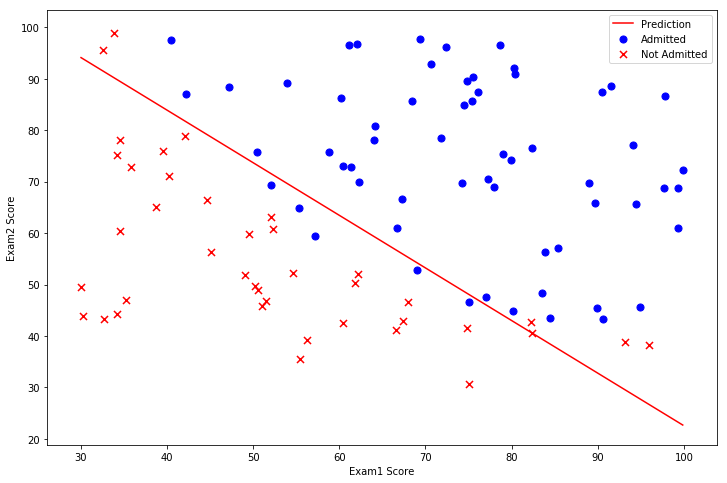

In [17]:
opTheta = result[0]
print(opTheta)
x = np.linspace(data.Exam1.min(), data.Exam1.max(), 100)
y = -opTheta[1] / opTheta[2] * x - opTheta[0] / opTheta[2] 
fig, ax = plt.subplots(figsize = (12, 8))
ax.plot(x, y, 'r', label='Prediction')
positive = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'].isin([0])]
ax.scatter(positive['Exam1'], positive['Exam2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam1'], negative['Exam2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam1 Score')
ax.set_ylabel('Exam2 Score')
plt.show()